#### Procesamiento de Señales
# Tarea Semanal 2
#### Santiago Naso

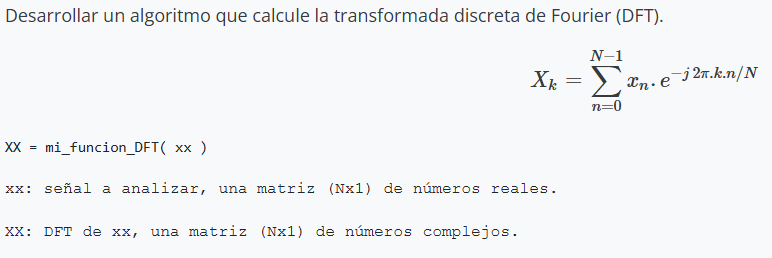

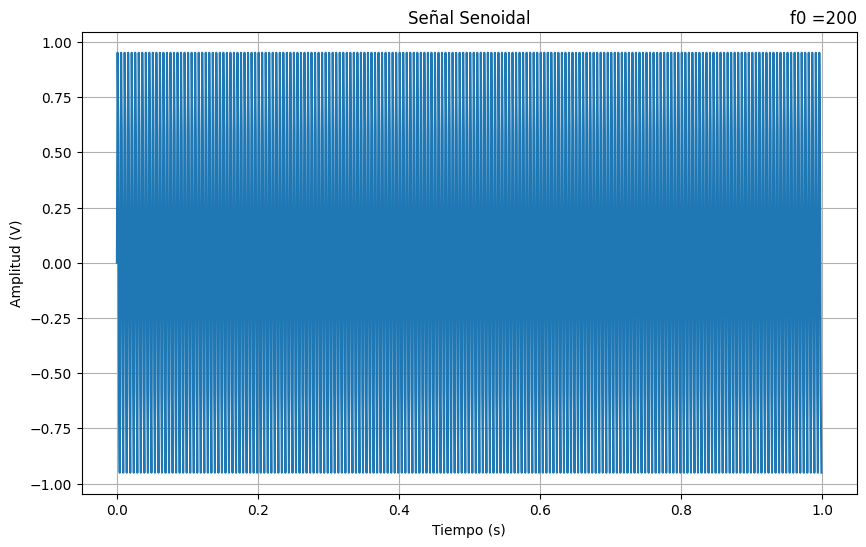

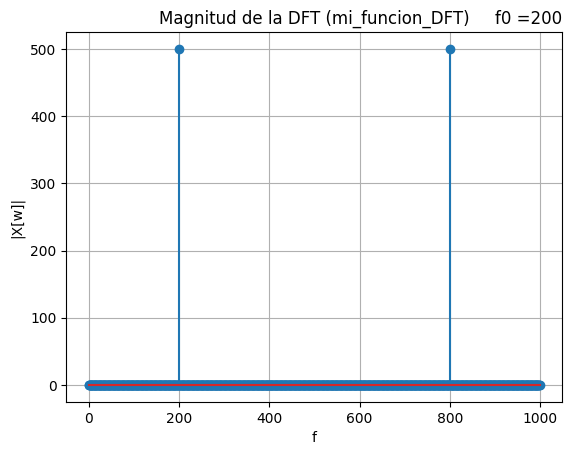

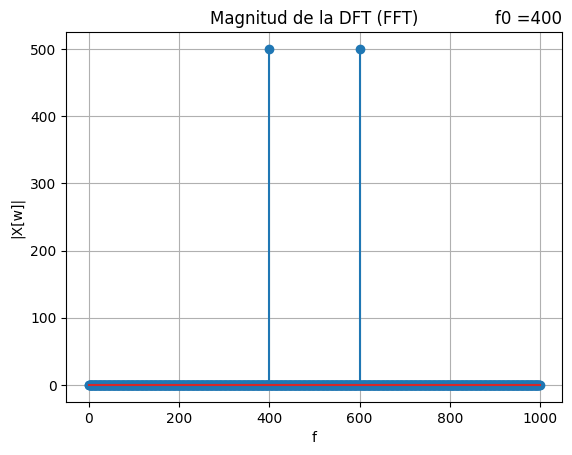

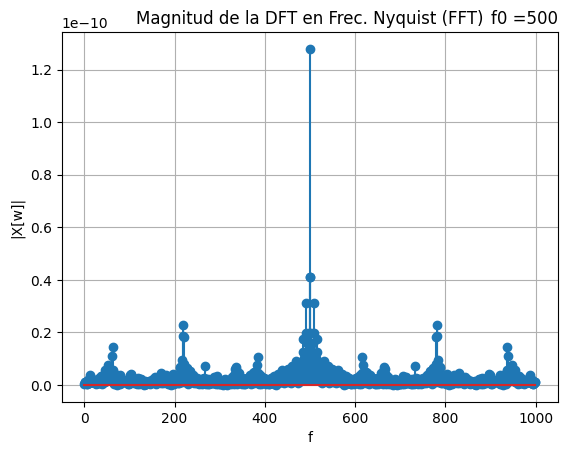

In [36]:
import numpy as np
import matplotlib.pyplot as plt


def mi_funcion_sen(vmax, dc, ff, ph, nn, fs):
    """
    Genera una señal senoidal parametrizable.
    
    Parámetros:
    vmax : Amplitud máxima de la senoidal (volts)
    dc   : Valor medio (volts)
    ff   : Frecuencia de la señal (Hz)
    ph   : Fase de la señal (radianes)
    nn   : Cantidad de muestras digitalizadas por el ADC
    fs   : Frecuencia de muestreo del ADC (Hz)
    
    Retorna:
    tt : Vector de tiempos (s)
    xx : Vector de valores de la señal
    """
    tt = np.arange(0, nn / fs, 1 / fs)  # Vector de tiempo
    """
    DeltaF = fs/nn : Resolución espectral
    1/DeltaF : Ventana
    fs/2 : Frecuencia de Nyquist
    
    """
    xx = vmax * np.sin(2 * np.pi * ff*(fs/nn) * tt + ph) + dc  # Señal senoidal
    
    return tt, xx

def mi_funcion_DFT(xx):
    N = len(xx)
    n = np.arange(N)
    k = n.reshape((N, 1))  # columna
    W = np.exp(-2j * np.pi * k * n / N)  # matriz NxN
    XX = np.dot(W, xx)  # producto matricial
    return XX

# Ejemplo de uso:
N = 1000  # Número de muestras
fs = 1000 # Frecuencia de muestreo
f0 = 200 # Tiene que ser menor a la frecuencia de Nyquist
f1 = 400 # Tiene que ser menor a la frecuencia de Nyquist
f2 = 500 # Tiene que ser menor a la frecuencia de Nyquist

tt, xx1 = mi_funcion_sen(vmax=1, dc=0, ff=f0, ph=0, nn=N, fs=fs)
tt, xx2 = mi_funcion_sen(vmax=1, dc=0, ff=f1, ph=0, nn=N, fs=fs)
tt, xx3 = mi_funcion_sen(vmax=1, dc=0, ff=f2, ph=0, nn=N, fs=fs)

XX = mi_funcion_DFT(xx1) # Con funcion

Sphase = np.angle(XX)
Smod = np.abs(XX)

S0 = np.fft.fft(xx2) # Con FFT
S1 = np.fft.fft(xx3) # Con FFT

# Graficar la señal
tl, xl = plt.subplots(figsize=(10, 6))
plt.plot(tt, xx1)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title("Señal Senoidal")
plt.title("f0 =" f'{f0}', loc="right")
plt.grid()
plt.show()

plt.figure()
plt.stem(Smod)
plt.title("Magnitud de la DFT (mi_funcion_DFT)")
plt.title("f0 =" f'{f0}', loc="right")
plt.xlabel("f")
plt.ylabel("|X[w]|")
plt.grid(True)
plt.show()

plt.figure()
plt.stem(np.abs(S0))
plt.title("Magnitud de la DFT (FFT)")
plt.title("f0 =" f'{f1}', loc="right")
plt.xlabel("f")
plt.ylabel("|X[w]|")
plt.grid(True)
plt.show()

plt.figure()
plt.stem(np.abs(S1))
plt.title("Magnitud de la DFT en Frec. Nyquist (FFT)")
plt.title("f0 =" f'{f2}', loc="right")
plt.xlabel("f")
plt.ylabel("|X[w]|")
plt.grid(True)
plt.show()